In [29]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
all_files = glob.glob("data/*MCS_lock.csv")

li = []

for filename in sorted(all_files):
    df = pd.read_csv(filename, index_col=None, header=0,sep=";")
    li.append(df)

MCS_lock_frame = pd.concat(li, axis=0, ignore_index=True)
MCS_lock_frame[["NumberOfThreads", "NumberOfIterations","RunTime","HowFair"]] = MCS_lock_frame[["NumberOfThreads", "NumberOfIterations","RunTime","HowFair"]].astype(float)


In [21]:
Ticket_lock_frame

,NumberOfThreads,NumberOfIterations,RunTime,HowFair,
0,10000.0,1.0,0.010290,0.00000,NaN
1,10000.0,2.0,0.012123,0.00000,NaN
2,10000.0,3.0,0.014709,1.78014,NaN
3,10000.0,4.0,0.022750,0.00000,NaN
4,10000.0,5.0,1.187730,183.46000,NaN
5,10000.0,6.0,1.509160,235.37000,NaN
6,10000.0,7.0,2.127590,3.68525,NaN
7,10000.0,8.0,1.901010,292.97000,NaN


In [55]:
frame.RunTime.mean()

0.05905735555555555

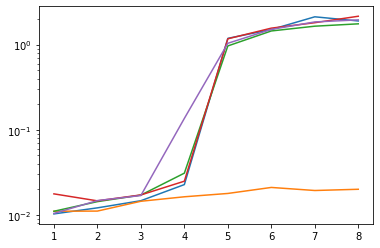

In [30]:
plt.semilogy(Ticket_lock_frame.NumberOfIterations,Ticket_lock_frame.RunTime)
plt.semilogy(TTAS_lock_frame.NumberOfIterations,TTAS_lock_frame.RunTime)
plt.semilogy(CLH_lock_frame.NumberOfIterations,CLH_lock_frame.RunTime)
plt.semilogy(Array_lock_frame.NumberOfIterations,Array_lock_frame.RunTime)
plt.semilogy(MCS_lock_frame.NumberOfIterations,MCS_lock_frame.RunTime)

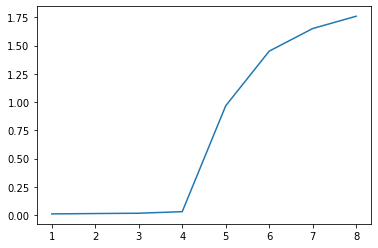

In [11]:
plt.plot(frame.NumberOfIterations,frame.RunTime)

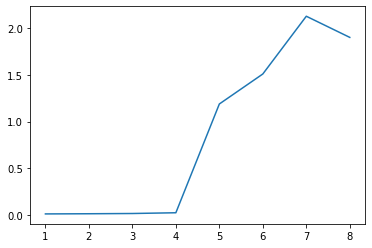

In [14]:
plt.plot(frame.NumberOfIterations,frame.RunTime)

In [ ]:
plt.plot(frame.NumberOfThreads,frame.RunTime)

In [ ]:
frame